<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Ecuaci%C3%B3n_hiperbolica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO EXPLÍCITO. ECUACIÓN DE ONDA.

##PLANTEAMIENTO DEL PROBLEMA

El objetivo es aproximar la solución de la ecuación de onda

$$\frac{∂^2u}{∂^2t}(x,t)-4\frac{∂^2u}{∂x^2}(x,t)=0 \quad 0<x<1, \quad 0<t $$

Sujeto a las condiciones de frontera
$$u(0,t)=0, \qquad u(1,t)=0$$

y condición inicial
$$u(x,0)=\sin(\pi x), \quad 0 \le x\le 1$$

Usaremos el método explícito, para ello consideraremos los valores:

$h=0.1 \quad k=0.05 \quad $

Compare los resultados con la solución exacta

$$u(x,0)=\sin(\pi x) \cos(2 \pi xt)$$








Considerando que partimos del problema híperbolico, donde esta ecuación corresponde a la ecuación de onda en su forma general.

$$ u_{tt}=α^2 u_{xx}$$

donde $c$  respresenta la velocidad de propagación de onda.

1. Calculare la constante $α$
  $$ \alpha^2=4 \to \qquad \alpha=\sqrt{4}=2$$

2. Calcular el parámetro de  λ
Es cual esta definido como la razon de:
$$λ=\frac{\alpha^2 k}{h^2}$$


  Sustituyendo los valores obtengo:

  $$λ=\frac{(2) (0.05)}{(0.1)^2} =1$$
  Este valor cumple exactamente la condición de estabilidad $\lambda \leq 1$ para el esquema explícito aplicado a la ecuación de onda.


3. Esquema explicito central en tiempo y el espacio

El método explícito de tres niveles para aproximar la solución se obtiene mediante:

$$u_{tt}(x_i,t_n)\approx \frac{u_i^{n+1}-2u_i^n+u_i^{n-1}}{k^2}$$


$$
u_{xx}(x_i,t_n)\approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{h^2}.
$$


Sustituyendo en la ecuación de onda y despejando $u_i^{n+1}$ se obtiene:

$$
u_i^{n+1}
=
2(1-\lambda^2)u_i^n
+
\lambda^2\left(u_{i+1}^n + u_{i-1}^n\right)
-
u_i^{n-1},
$$

con
$$
\lambda = \frac{\alpha k}{h}, \qquad \alpha=2.
$$


4. Forma matrcial


Sea el vector de incógnitas:
$$
\mathbf{u}^{n}=
\begin{bmatrix}
u_1^{n} \\
u_2^{n} \\
\vdots \\
u_{m-1}^{n}
\end{bmatrix},
\qquad
\mathbf{u}^{n-1}=
\begin{bmatrix}
u_1^{n-1} \\
u_2^{n-1} \\
\vdots \\
u_{m-1}^{n-1}
\end{bmatrix}.
$$


Entonces, el método explícito puede escribirse en forma matricial como:
$$
\mathbf{u}^{n+1}
=
A\,\mathbf{u}^{n}
-
\mathbf{u}^{n-1},
$$
donde la matriz $A$ es tridiagonal y está dada por:
$$
A=
\begin{bmatrix}
2(1-\lambda^2) & \lambda^2 & 0 & \cdots & 0\\
\lambda^2 & 2(1-\lambda^2) & \lambda^2 & \cdots & 0\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \cdots & \lambda^2 & 2(1-\lambda^2) & \lambda^2\\
0 & 0 & \cdots & \lambda^2 & 2(1-\lambda^2)
\end{bmatrix}.
$$


Esta representación matricial resume la estructura del método explícito y su dependencia de los valores en los tiempos $n$ y $n-1$, característica fundamental de la ecuación de onda.








In [103]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap
from tabulate import tabulate #Libreria para crear tablas


Defino la función que corresponde a la condición inicial
$$u(x,0)=\sin(\pi x)$$

In [104]:
def f(x):
    return np.sin(np.pi*x)

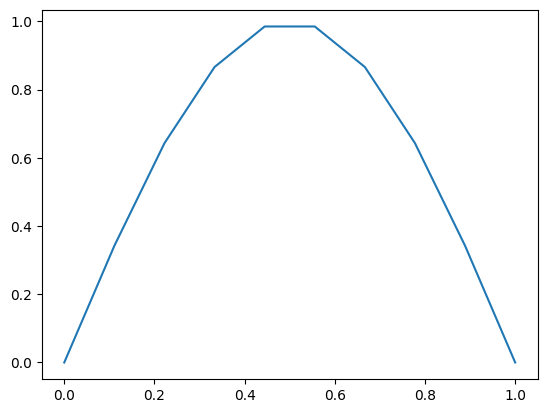

In [105]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

Definimos a la matriz A de una manera más simple, es decir sin necesidad de escibirla toda manualmente

In [106]:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

In [107]:
r=1   #es al que nombramos lambda

In [108]:
A=tridiagonal(9,2-(2*r),r)
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Definimos el vector $b$

In [109]:
b=sp.Matrix([f(0.1*(i+1))for i in range (9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [110]:
# ================================================
#     Defino los parametros
# ================================================

import numpy as np

# Parámetros del problema
h=0.1                  # paso espacial
k=0.05                 # paso temporal
alpha=2                # velocidad de la onda
lam = alpha * k / h    # parámetro lambda

print("Parámetros definidos correctamente")
print(f"h = {h},   k = {k},   alpha = {alpha},   lambda = {lam}")



Parámetros definidos correctamente
h = 0.1,   k = 0.05,   alpha = 2,   lambda = 1.0


El número total de puntos espaciales es:

$$
x_i = ih, \qquad i = 0,1,\dots,10.
$$

El tiempo se simula hasta un valor máximo $T=0.50$, lo cual genera:

$$
t_n = nk, \qquad n = 0,1,\dots,10.
$$

In [111]:
# ==========================================================
#   Defino la malla espacial y temporal
# ==========================================================

# Malla espacial: 0, 0.1, ..., 1
x = np.linspace(0, 1, int(1/h) + 1)
Nx= len(x)

# Malla temporal: 0, 0.05, ..., 0.50
T = 1.0
t= np.linspace(0, T, int(T/k)+1)
Nt=len(t)

print(f"Nodos espaciales: {Nx}")
print(f"Pasos de tiempo: {Nt}")



Nodos espaciales: 11
Pasos de tiempo: 21


In [112]:
# ==========================================================
#   Condiciones iniciales
# ==========================================================

# u(x,0) = sin(pi x)
def u0(x):
    return np.sin(np.pi * x)

# u_t(x,0) = 0
def ut0(x):
    return 0.0   # NO depende de x

# Solución exacta (para ejercicios 2 y 3)
def u_exact(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

In [113]:
# ==========================================================
#   MATRIZ U: almacenará la solución numérica
#   Filas -> tiempo t_n
#   Columnas -> posición x_i
# ==========================================================

U= np.zeros((Nt, Nx))

# t = 0  → condición inicial directa
U[0,:]=u0(x)


In [114]:
# ==========================================================
# Cálculo de u^1 (t = k)
# Usamos el desarrollo central especial para paso 1
# ==========================================================

# para los nodos interiores
for i in range (1, Nx -1):
  U[1,i]=(
      U[0,i]
      + lam**2*0.5* (U[0,i+1]-2*U[0,i]+U[0,i-1])
  )


# Condiciones de frontera
U[1, 0]  = 0.0
U[1, -1] = 0.0

print("Malla construida correctamente y condiciones iniciales aplicadas.")

Malla construida correctamente y condiciones iniciales aplicadas.


Una vez que se obtuvieron los valores en los tiempos $t_0$ y $t_1$, el método explícito (3 niveles) permite calcular la solución en los tiempos posteriores mediante:
$$
u_i^{n+1}
=
2(1 - \lambda^2)\,u_i^n
+
\lambda^2\left(u_{i+1}^n + u_{i-1}^n\right)
-
u_i^{n-1},
$$

donde:

$$
\lambda = \frac{\alpha k}{h}, \qquad \alpha = 2.
$$

En este problema $λ=1$, por lo cual de foma simplificiada tengo:

$$
u_i^{n+1} = u_{i+1}^n - 2u_i^n + u_{i-1}^n + u_i^{n-1}.
$$

Este esquema se aplica únicamente a los nodos interiores  
$$i = 1,2,\ldots,N_x -2$$
respetando las condiciones de frontera homogéneas:

$
u_0^n = u_{N_x-1}^n = 0.
$

A continuación se presenta la implementación del método explícito utilizando la
malla previamente construida.

In [116]:
# ==========================================================
#   Método explicito utilizando la malla que se construyo anteriormente
# ==========================================================

# Recorremos los tiempos n=1,2,..., Nt-2
for n in range(1, Nt-1):

  #para los nodos interiores i=1, ..., Nx-2
  for i in range (1, Nx-1):

    U[n+1,i]=(
        2*(1-lam**2)*U[n,i]             #término central
        +lam**2 *(U[n, i+1] +U[n, i-1])  #son las dependencias espaciales
        -U[n-1,i]                       #son los niveles temporales anteriores
    )



    # Condiciones de frontera homogéneas
    U[n+1, 0]  = 0.0
    U[n+1, -1] = 0.0

print("Método explícito aplicado correctamente.")


Método explícito aplicado correctamente.


**EJERCICIO 1** Generar las gráficas 2D y 3D de la solución hasta $t=0.50$

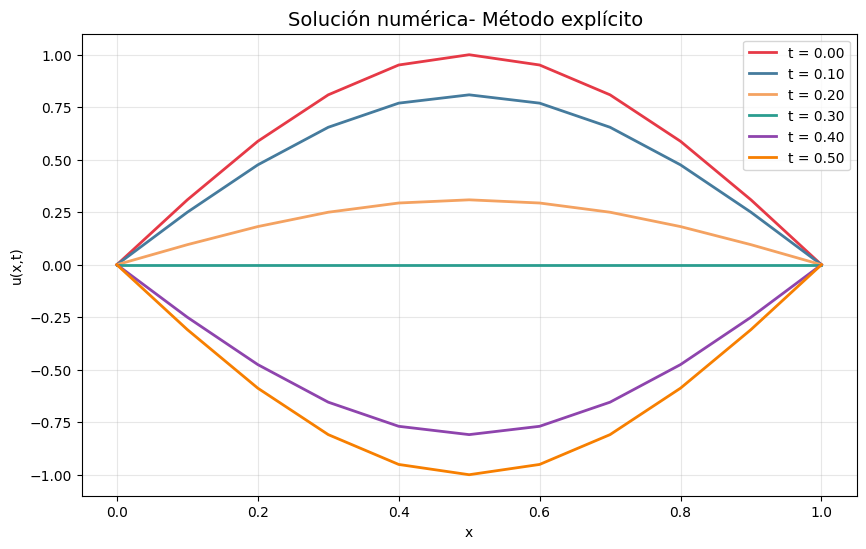

In [120]:
# ==========================================================
# Ejercicio 1: Gráficas 2D
# ==========================================================


import matplotlib.pyplot as plt

#colores
colores = ["#E63946", "#457B9D", "#F4A261", "#2A9D8F", "#8E44AD", "#F77F00"]


tiempos_interes = [0, 0.10, 0.20, 0.30, 0.40, 0.50]
indices_t = [int(tiempo/k) for tiempo in tiempos_interes]

plt.figure(figsize=(10,6))

for tiempo, idx, col in zip(tiempos_interes, indices_t, colores):
    plt.plot(x, U[idx, :], label=f"t = {tiempo:.2f}", color=col, linewidth=2)

plt.title("Solución numérica- Método explícito ", fontsize=14)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Dicha gráfica nos permite observar el comportamiento de la onda en instantes discretos. Notemos que:

Verás que:

- $t=0$  arranca con $\sin(𝜋𝑥)$
- Para $t>0$ sube y baja y eso se debe al comporatmiento oscilatorio.

Además siempre con cero en los extremos (por las condiciones de frontera)

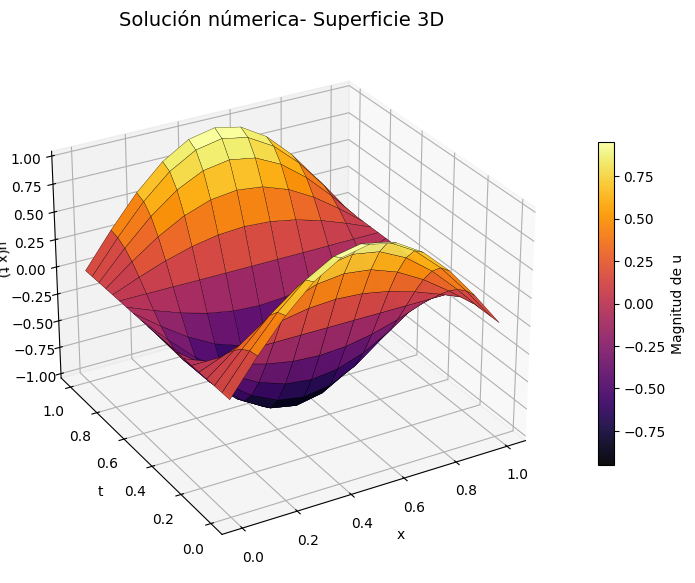

In [123]:
# ==========================================================
# Ejercicio 1: Gráfica 3D
# ==========================================================

from mpl_toolkits.mplot3d import Axes3D
X, Tmesh= np.meshgrid(x,t)

fig =plt.figure(figsize=(12,7))
ax= fig.add_subplot(111, projection='3d')

#Mapa de colores
ax.plot_surface(X, Tmesh, U, cmap='plasma')

# Superficie con un colormap distinto (inferno → cálido y contrastante)
superficie = ax.plot_surface(
    X, Tmesh, U,
    cmap='inferno',
    edgecolor='k',
    linewidth=0.2,
    alpha=0.95
)

ax.set_title("Solución númerica- Superficie 3D", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")

# Barra de colores
fig.colorbar(superficie, shrink=0.6, label="Magnitud de u")

# Ajuste del ángulo para visualizarlo
ax.view_init(elev=28, azim=-120)


plt.show()


La gráfica muestra la evolución de la solución en el plano $(x,t)$, facilitando visualizar las oscilaciones características de la cuación de onda.  
Observamos que también existe simetría $x=0.5$ y además es periodica.  

**EJERCICIO 2** Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.

Vamos a comparar la solución númerica en $t=1.0$ con la tabla del libro, cuyo valor teórico es:


$$
w_{i,20} = \sin(\pi x_i),
\qquad
x_i = 0,\, 0.1,\, 0.2,\, \ldots,\, 1.
$$

Nótese que la malla espacial utilizada en nuestro método
$
h = 0.1
$


In [125]:
# ================================================================
# EJERCICIO 2: Comparación con la Tabla
# ================================================================

from tabulate import tabulate


#  Extraer solución numérica a t = 1.0
n_t = int(1.0 / k)       # índice en la malla temporal
u_num = U[n_t, :]        # solución numérica en t = 1


# Valores de referencia de la Tabla 12.6
tabla_ref = np.sin(np.pi * x)     # exactamente como en el libro



#  Error absoluto
error_abs = np.abs(u_num - tabla_ref)

# Construcción de tabla comparativa
filas = []
for i in range(Nx):
    filas.append([
        f"{x[i]:.1f}",
        f"{tabla_ref[i]:.10f}",
        f"{u_num[i]:.10f}",
        f"{error_abs[i]:.4f}"
    ])

encabezados = ["x_i", "Tabla 12.6", "Numérico explícito", "Error abs."]

print(tabulate(filas, headers=encabezados, tablefmt="grid"))

#  Errores globales
print("\nError máximo:", np.max(error_abs))
print("Error medio: ", np.mean(error_abs))


+-------+--------------+----------------------+--------------+
|   x_i |   Tabla 12.6 |   Numérico explícito |   Error abs. |
+=======+==============+======================+==============+
|   0   |     0        |             0        |            0 |
+-------+--------------+----------------------+--------------+
|   0.1 |     0.309017 |             0.309017 |            0 |
+-------+--------------+----------------------+--------------+
|   0.2 |     0.587785 |             0.587785 |            0 |
+-------+--------------+----------------------+--------------+
|   0.3 |     0.809017 |             0.809017 |            0 |
+-------+--------------+----------------------+--------------+
|   0.4 |     0.951057 |             0.951057 |            0 |
+-------+--------------+----------------------+--------------+
|   0.5 |     1        |             1        |            0 |
+-------+--------------+----------------------+--------------+
|   0.6 |     0.951057 |             0.951057 |        

Recordemos que la solución exacta del problema es:

$$
u(x,t) = \sin(\pi x)\cos(2\pi t)
$$

Evaluamos en \( t = 1.0 \), por lo que:

$$
u(x,1) = \sin(\pi x)\cos(2\pi)
       = \sin(\pi x)\cdot 1
       = \sin(\pi x)
$$

Es decir la solución exacta coincide exactamente con la Tabla 12.6 del libro.

**EJERCICIO 3**  Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.

In [132]:
# ============================================================
#   EJERCICIO 3: Comparación con la solución exacta
# ============================================================

import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# Recuperamos la solución numérica en t = 1.0
u_num =U[-1, :]         # Última fila de la matriz U
t_final=t[-1]           # t = 1.0

# Solución exacta
u_ex = u_exact(x, t_final)


# Error absoluto
error_abs =np.abs(u_num- u_ex)


# Construcción de la tabla
tabla =[]
for i in range (len(x)):
  tabla.append([x[i], u_ex[i], u_num[i], error_abs[i]])

encabezados = ["x_i", "Exacta u(x,1)", "Numérica", "Error abs"]

print("\nComparación solución numérica vs solución exacta (t = 1.0)\n")
print(tabulate(tabla, headers=encabezados,
               tablefmt="grid", floatfmt=".10f"))

print("\nError máximo:", np.max(error_abs))
print("Error medio  :", np.mean(error_abs))





Comparación solución numérica vs solución exacta (t = 1.0)

+--------------+-----------------+--------------+--------------+
|          x_i |   Exacta u(x,1) |     Numérica |    Error abs |
+==============+=================+==============+==============+
| 0.0000000000 |    0.0000000000 | 0.0000000000 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.1000000000 |    0.3090169944 | 0.3090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.2000000000 |    0.5877852523 | 0.5877852523 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.3000000000 |    0.8090169944 | 0.8090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.4000000000 |    0.9510565163 | 0.9510565163 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.5000000000 |    1.0000000000 | 1.0000000000 | 0.0000000000 |
+--------------+-------------

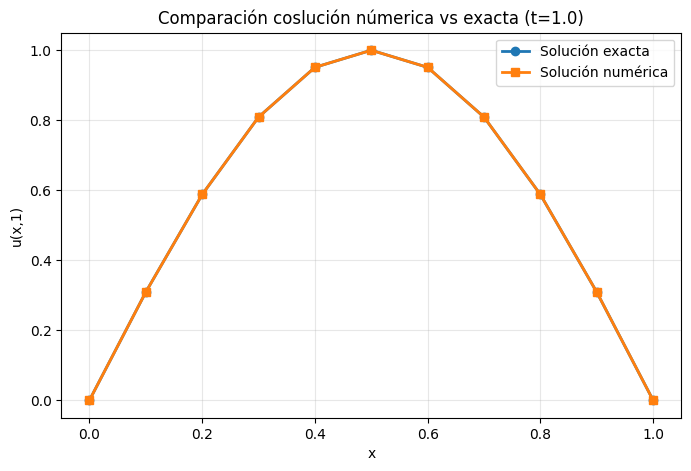

In [134]:
#gráfica comparativa

plt.figure(figsize=(8,5))
plt.plot(x, u_ex, "-o", label="Solución exacta", linewidth=2)
plt.plot(x, u_num, "-s", label="Solución numérica", linewidth=2)

plt.title("Comparación coslución númerica vs exacta (t=1.0)")
plt.xlabel("x")
plt.ylabel("u(x,1)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



**EJERCICIO 4** Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.

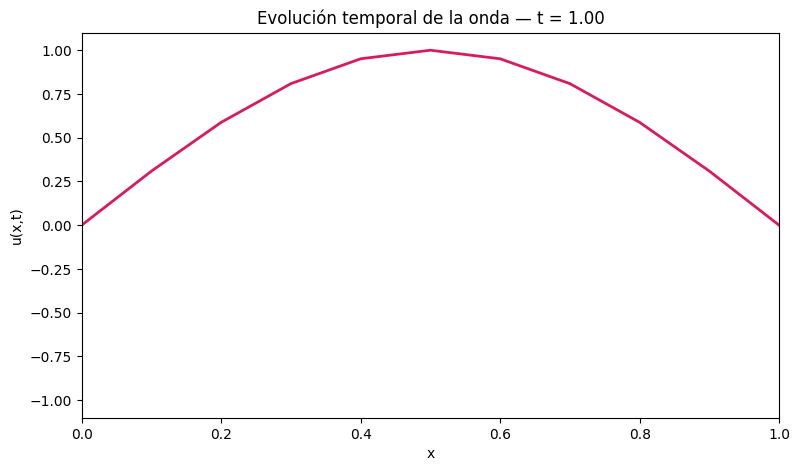

In [138]:
# ================================================================
# EJERCICIO 4: Animación de la evolución temporal de la solución
# ================================================================

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#  Configuración de la figura
fig, ax = plt.subplots(figsize=(9,5))

linea, = ax.plot([], [], lw=2, color="#D81B60")   # curva que se actualizará
ax.set_xlim(0, 1)
ax.set_ylim(-1.1, 1.1)

ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución temporal de la onda — Método explícito")

#  Función de inicialización
def init():
    linea.set_data([], [])
    return linea,

#  Función que actualiza la gráfica cuadro por cuadro
def actualizar(frame):
    y = U[frame, :]          # perfil en tiempo t_n
    linea.set_data(x, y)
    ax.set_title(f"Evolución temporal de la onda — t = {t[frame]:.2f}")
    return linea,

#  Crear la animación
anim = FuncAnimation(
    fig,
    actualizar,
    frames=Nt,         # un cuadro por cada tiempo
    init_func=init,
    interval=120,      # velocidad de animación en ms
    blit=True
)

# Mostrar animación en el notebook (Colab la soporta)
HTML(anim.to_jshtml())


Lo que hace la animación es lo sigiuiente:
- Se recorre la matriz $U[n,i]$obtenida mediante el método explícito para la ecuación de onda.

-  En cada fotograma de la animación se grafica la curva

    $$ u(x,t_n),$$

    correspondiente al instante temporal $ t_n $

- El título de la gráfica se actualiza dinámicamente para mostrar el valor del tiempo $t_n $.

-  La animación permite observar claramente las oscilaciones características de la onda conforme avanza el tiempo.

- El algoritmo funciona correctamente con $N_t = 21$ , como se determinó previamente.
